In [4]:
from plot_tool import *
from matplotlib import pyplot
import pandas as pd
import numpy as np

In [5]:
# set up log variables
path_to_save = "/media/john/HDD/Dubins_2D_preprocessed.log"
blacklist = ["obs", "time"]              # list of log keys to omit
is_jsonlines_file = False

In [6]:
# read from file
metadata_df, episode_dataframes = process_log(path_to_save, False, blacklist)

In [13]:
# display metadata table
pd.set_option("display.max_rows", None, "display.max_columns", 500, "display.width", 500)

metadata_df.head(10)
# metadata_df.tail(100)
# print(metadata_df)

,worker_episode_number,episode_ID,episode_duration,episode_success,episode_failure
0,0,288545018,443,False,distance
1,1,1222356005,737,False,distance
2,2,1819850095,499,False,distance
3,3,1722851096,396,False,distance
4,4,1640193506,489,False,distance
5,5,135520872,520,False,distance
6,6,547756574,410,False,distance
7,7,253228484,658,False,distance
8,8,1063938749,1000,False,timeout
9,9,1634154402,1000,False,timeout


In [14]:
# set up variables to plot
episode_ID = 288545018
episode_dataframe = episode_dataframes[episode_ID]
# x_variables = {"step_number": episode_dataframe["step_number"]}
x_variable = episode_dataframe["step_number"]
y_variables = {"x": episode_dataframe["info_wingman_x"],
               "y": episode_dataframe["info_wingman_y"]}

Text(0.5, 1.0, 'Episode 288545018:\n Position vs. Step Number')

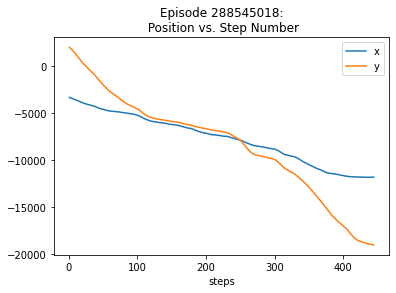

In [22]:
# create plot
figure, axes = pyplot.subplots()
plot(x_variable, y_variables, axes)

axes.set_xlabel("steps")
axes.set_ylabel("")
axes.legend(y_variables.keys())
axes.set_title("Episode {}:\n Position vs. Step Number".format(episode_ID))

Text(0.5, 1.0, 'Episode 288545018:\n Lead Position vs. Step Number')

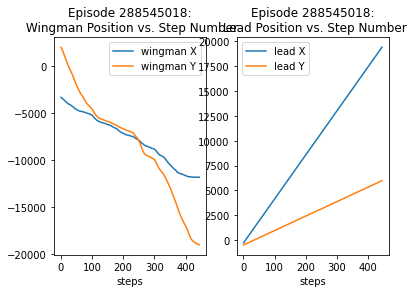

In [21]:
# create complex plots with custom variables
time = episode_dataframe["step_number"] * episode_dataframe["info_timestep_size"]

figure, axes = pyplot.subplots(1,2)

y1 = {"wingman X": episode_dataframe["info_wingman_x"],
                  "wingman Y": episode_dataframe["info_wingman_y"]}
y2 = {"lead X": episode_dataframe["info_lead_x"],
                  "lead Y": episode_dataframe["info_lead_y"]}

plot(time, y1, axes[0])
plot(time, y2, axes[1])

axes[0].set_xlabel("steps")
axes[1].set_xlabel("steps")
axes[0].legend(y1.keys())
axes[1].legend(y2.keys())
axes[0].set_title("Episode {}:\n Wingman Position vs. Step Number".format(episode_ID))
axes[1].set_title("Episode {}:\n Lead Position vs. Step Number".format(episode_ID))